# NAFLD Group Python Demo
August 30, 2016

## 1. What is Python?

Python is a (free!) open-source programming language supported by all major operating systems. It is used for a variety of purposes, from software and web development to statistical and "big data" analyses, and known for it's emphasis on "readable" code. 

With regards to statistical analyses, Python is comparable to SAS, Stata, R, Excel, and other analysis tools with a few key differences. Python is a general-purpose programming language, which means that ydour entire analysis must be done from the ground-up - there is no software to structure or guide your analysis. However, there are many libraries (see below) supported by active communities which have built up support for statistical analysis. This is also a key advantage to Python which allows it to process large data sets and handle data analysis workflows from start to finish (managing data, analyzing, modeling, and visualizing).

Finally, the tool we will be using today to explore Python is called Jupyter Notebook. It is a web application that allows us to execute lines of code individually, rather than compiling an entire program at once. This allows us to program more interactively and present our results in step-by-step fashion.

## 2. Load Libraries (Toolkits)

In [75]:
#import modules
import numpy as np #Numpy is a mathematics library
import pandas as pd #Pandas is a data structures and data analysis library
import scipy #Scipy is a scientific computing library 
from scipy import stats 
import matplotlib.pyplot as plt #Matplotlib is a graphical plotting library
%matplotlib inline

## 3. Import Dataset

In [76]:
#import datasets
df = pd.read_csv('crc_pres.csv') #This is our original dataset
df

,age,gender,race,ethnicity,fit,labchemresultvalue,fitdate,colo,colodate,sig,sigdate,healthfactortype,clnind,comments,Raceethnicity,screened,screenmethod,fit-colo-time
0,52,M,AMERICAN INDIAN OR ALASKA NATIVE,HISPANIC OR LATINO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hispanic,0,none,NaN
1,53,M,AMERICAN INDIAN OR ALASKA NATIVE,HISPANIC OR LATINO,FIT,Negative,5/28/14 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hispanic,1,fit,NaN
2,52,M,AMERICAN INDIAN OR ALASKA NATIVE,HISPANIC OR LATINO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hispanic,0,none,NaN
3,52,M,AMERICAN INDIAN OR ALASKA NATIVE,HISPANIC OR LATINO,FIT,Negative,8/14/13 7:50,NaN,NaN,NaN,NaN,CRS-NORMAL COLONOSCOPY,NaN,NaN,Hispanic,1,fit,NaN
4,50,M,AMERICAN INDIAN OR ALASKA NATIVE,HISPANIC OR LATINO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hispanic,0,none,NaN
5,50,M,AMERICAN INDIAN OR ALASKA NATIVE,HISPANIC OR LATINO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hispanic,0,none,NaN
6,53,M,AMERICAN INDIAN OR ALASKA NATIVE,HISPANIC OR LATINO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hispanic,0,none,NaN
7,50,M,AMERICAN INDIAN OR ALASKA NATIVE,HISPANIC OR LATINO,FIT,Negative,8/6/15 10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hispanic,1,fit,NaN
8,53,M,AMERICAN INDIAN OR ALASKA NATIVE,HISPANIC OR LATINO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hispanic,0,none,NaN
9,52,M,AMERICAN INDIAN OR ALASKA NATIVE,NOT HISPANIC OR LATINO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,0,none,NaN


## 4. Summarize and explore the data

In [77]:
len(df)

1515

51.414521452145216

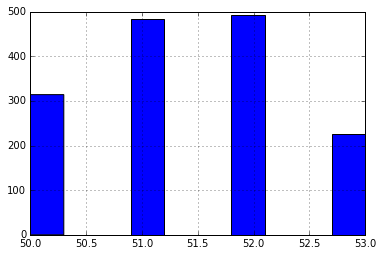

In [78]:
df['age'].hist()
df['age'].value_counts().sort_values()
df['age'].mean()

M    1280
F    235 
Name: gender, dtype: int64

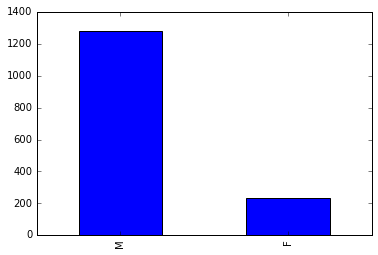

In [79]:
df['gender'].value_counts().plot(kind='bar')
df['gender'].value_counts()

White       641
Black       483
Hispanic    234
Other       107
Unknown     50 
Name: Raceethnicity, dtype: int64

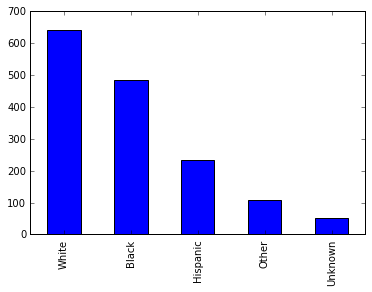

In [80]:
df['Raceethnicity'].value_counts().plot(kind='bar')
df['Raceethnicity'].value_counts()

0    823
1    692
Name: screened, dtype: int64
rate of screening: 0.456765676568


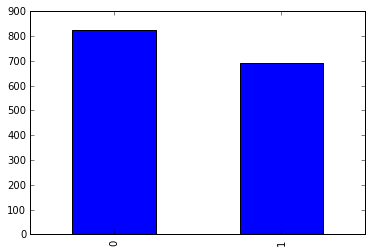

In [81]:
df['screened'].value_counts().plot(kind='bar')
print(df['screened'].value_counts())
print('rate of screening:', df['screened'].value_counts()[1]/len(df))


none          823
fit           536
colo          82 
colo + fit    70 
sig           4  
Name: screenmethod, dtype: int64

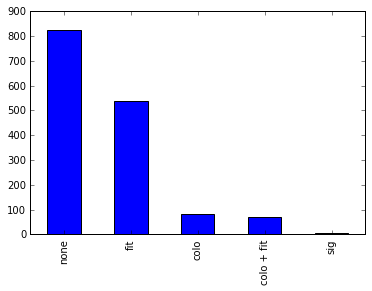

In [82]:
df['screenmethod'].value_counts().plot(kind='bar')
df['screenmethod'].value_counts()

Negative    567
Positive    39 
Name: labchemresultvalue, dtype: int64

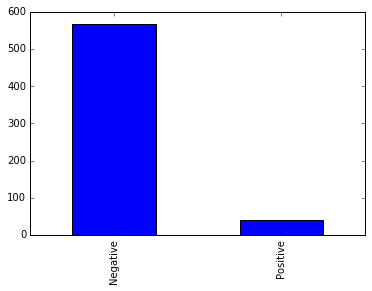

In [83]:
df['labchemresultvalue'].value_counts().plot(kind='bar')
df['labchemresultvalue'].value_counts()

## 5. Analysis

### A. Screening Utilization

In [84]:
# Give ourselves some custom functions
def screencount(x):
    count = np.count_nonzero(x==1)
    return count
def count(x):
    return len(x)
def screenpercent(x):
    count = np.count_nonzero(x==1)
    return count/len(x)

screened              
       screencount screenpercent
gender                          
F       104         0.442553    
M       588         0.459375

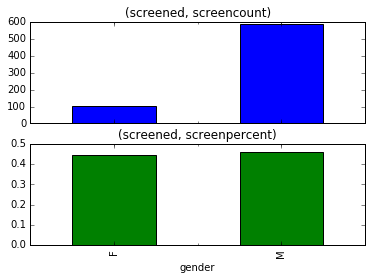

In [85]:
#Male vs. Female Screening Rates
df_table1 = df.groupby(['gender']).agg({
                                             'screened': [screencount, screenpercent],
                                            })
df_table1.plot(kind='bar', legend=None, subplots='True')
df_table1

screened              
              screencount screenpercent
Raceethnicity                          
Black          233         0.482402    
Hispanic       97          0.414530    
Other          46          0.429907    
Unknown        19          0.380000    
White          297         0.463339

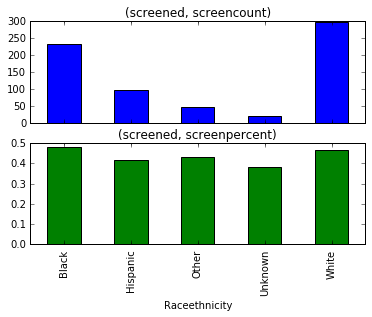

In [86]:
#Race/Ethnicity Screening Rates
df_table2 = df.groupby(['Raceethnicity']).agg({
                                             'screened': [screencount, screenpercent],
                                            })
df_table2.plot(kind='bar', legend=None, subplots=True)
df_table2

screened              
                     screencount screenpercent
gender Raceethnicity                          
F      Black          42          0.518519    
       Hispanic       11          0.478261    
       Other          7           0.388889    
       Unknown        2           0.333333    
       White          42          0.392523    
M      Black          191         0.475124    
       Hispanic       86          0.407583    
       Other          39          0.438202    
       Unknown        17          0.386364    
       White          255         0.477528

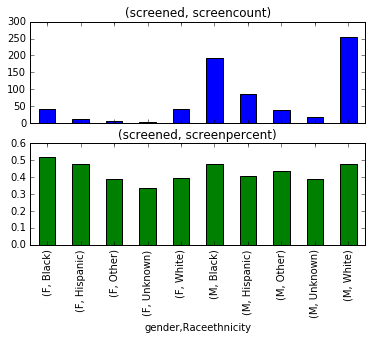

In [87]:
#Race/Ethnicity and Gender Screening Rates
df_table3 = df.groupby(['gender','Raceethnicity']).agg({
                                             'screened': [screencount, screenpercent],
                                            })
df_table3.plot(kind='bar', legend=None, subplots=True)
df_table3

### B. Screening Method

In [88]:
#Again, give ourselves a set of functions
def colo_pct(x):
    counter = 0
    for i in x:
        if pd.isnull(i):
            counter = counter
        else:
            counter = counter+1
    a = counter/len(x)
    a = a*100
    return round(a,1)

def fit_pct(x):
    counter = 0
    for i in x:
        if pd.isnull(i):
            counter = counter
        else:
            counter = counter+1
    a = counter/len(x)
    a = a*100
    return round(a,1)

def sig_pct(x):
    counter = 0
    for i in x:
        if pd.isnull(i):
            counter = counter
        else:
            counter = counter+1
    a = counter/len(x)
    a = a*100
    return round(a,1)

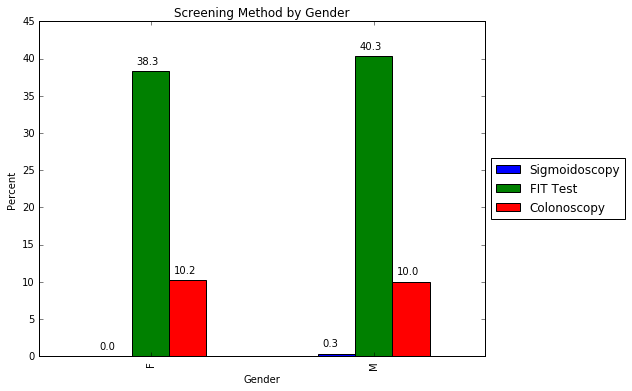

In [89]:
df_table4 = df.groupby(['gender']).agg({
                                        'colo': [colo_pct],
                                        'fit': [fit_pct],
                                        'sig': [sig_pct],
                                        })
df_table4
table1 = df_table4.plot(figsize=(8,6), kind='bar', title = 'Screening Method by Gender', legend=None)
table1.set_xlabel("Gender")
table1.set_ylabel("Percent")
table1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), labels =['Sigmoidoscopy','FIT Test','Colonoscopy'])
for p in table1.patches:
    table1.annotate(str(p.get_height()), xy=(p.get_x() + .02, p.get_height() + 1))
table1

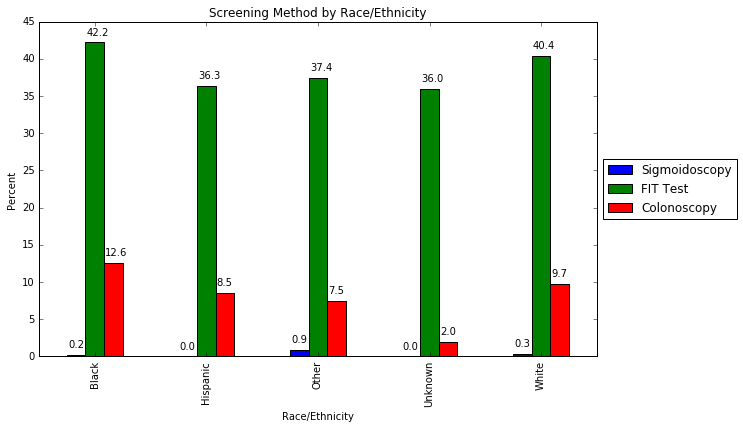

In [90]:
df_table5 = df.groupby(['Raceethnicity']).agg({
                                        'colo': [colo_pct],
                                        'fit': [fit_pct],
                                        'sig': [sig_pct],
                                        })
df_table5
table2 = df_table5.plot(figsize=(10,6), kind='bar', title = 'Screening Method by Race/Ethnicity', legend=None)
table2.set_xlabel("Race/Ethnicity")
table2.set_ylabel("Percent")
table2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), labels =['Sigmoidoscopy','FIT Test','Colonoscopy'])
for p in table2.patches:
    table2.annotate(str(p.get_height()), xy=(p.get_x() + .01, p.get_height() + 1))
table2

### C. Statistical Significance

In [97]:
#Give ourselves a nice function to compute the chi2 contingency statistics for two groups

def compute_freq_chi2(x,y):
    """This function will compute frequency table of x an y
    Pandas Series, and use the table to feed for the contigency table
    
    Parameters:
    -------
    x,y : Pandas Series, must be same shape for frequency table
    
    Return:
    -------
    None. But prints out frequency table, chi2 test statistic, and 
    p-value
    """
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = scipy.stats.chi2_contingency(freqtab, correction=False)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    print("")
    return

In [98]:
fd = df[['screened','screenmethod','gender','Raceethnicity','labchemresultvalue']]
fd['Raceethnicity'] = fd['Raceethnicity'].astype("category")
fd['gender'] = fd['gender'].astype("category")
fd['screenmethod'] = fd['screenmethod'].astype("category")

/Users/ramdixit/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/ramdixit/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/ramdixit/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [99]:
gen = fd.gender
scr = fd.screened
td = pd.concat([gen, scr], axis=1)
td.columns = ['gen','scr']
td = td.dropna()
compute_freq_chi2(td.gen, td.scr)

Frequency table
scr    0    1
gen          
F    131  104
M    692  588
ChiSquare test statistic:  0.22642788238
p-value:  0.634185243439



In [101]:
def race_chi2(list):
    rne = fd.Raceethnicity.cat.remove_categories(list)
    scr = fd.screened
    td = pd.concat([rne, scr], axis=1)
    td.columns = ['rne','scr']
    td = td.dropna()
    compute_freq_chi2(td.rne, td.scr)
    return

race_chi2(['Black','Other','Unknown'])
race_chi2(['Hispanic','Other','Unknown'])
race_chi2(['Black','Hispanic','Unknown'])
race_chi2(['Black','Hispanic','Other'])

Frequency table
scr         0    1
rne               
Hispanic  137  97 
White     344  297
ChiSquare test statistic:  1.64980905004
p-value:  0.198984922393

Frequency table
scr      0    1
rne            
Black  250  233
White  344  297
ChiSquare test statistic:  0.401695759112
p-value:  0.526214793259

Frequency table
scr      0    1
rne            
Other  61   46 
White  344  297
ChiSquare test statistic:  0.412780104696
p-value:  0.520561796204

Frequency table
scr        0    1
rne              
Unknown  31   19 
White    344  297
ChiSquare test statistic:  1.29801418696
p-value:  0.254576274016



## Thank you for your time!
### Please reach